<h1>The Effect Age & Experience has on Minecraft Player's Total Hours!</h1>

<h1>Introduction</h1>

<p>In this project, we are looking into a dataset collected from player activity on a Minecraft server. Minecraft is a open world survival video game, and player data can provide valuable insight into the video game industry.</p>

<h3>Question:</h3>
<p><b>Can player experience and age accurately predict total played hours on a server?</b></p>


<h3>Data Description</h3>
<p>We are focusing only on the players data set.</p>

<h3>players.csv</h3>
<ul>
    <li>196 Observations</li>
    <h4>Variables:</h4>
    <li>9 Variables</li>
    <li><b>experience: </b>Character, player's experience in Minecraft</li>
    <li><b>subscribe: </b>Boolean, is player subscribed to PlaiCraft's email updates?</li>
    <li><b>hashedEmail: </b>Character, player's email</li>
    <li><b>played_hours: </b>Double, amount of hours player has played on the server</li>
    <li><b>name: </b>Character, name of player</li>
    <li><b>gender: </b>Character, gender of player</li>
    <li><b>age: </b>Double, age of player</li>
    <li><b>individualID:</b> Boolean, ID of player</li>
    <li><b>organizationName:</b> Boolean, player's organization name</li>
    <h4>Potential Issues</h4>
    <li>experience and gender should be categorical (factor) instead of characters</li>
    <li>individualID and organizationName has only N/A values, so these two variables should be disgarded</li>
</ul>


<h2>sessions.csv</h2>
<ul>
    <li>1535 Observations</li>
    <h4>Variables:</h4>
    <li>5 Variables</li>
    <li><b>hashedEmail: </b>Character, player's email</li>
    <li><b>start_time: </b>Character, time player begins session</li>
    <li><b>end_time: </b>Character, time player ends session</li>
    <li><b>original_start_time: </b>Double, time player beings session in UNIX time</li>
    <li><b>original_end_time: </b>Double, time at which player ends session in UNIX time</li>
    <h4>Issues</h4>
    <li>values under start_time and end_time have a space between date and time > data is untidy</li>
    <li>start_time and end_time should be converted the Date objects which should make the data tidy</li>
    <li>original_start_time and original_end_time use scientific notation which may pose issues</li>
</ul>


<h1>Methods and Results</h1>

<p>Describe Methods here</p>
<p><b>MAKE SURE TO LABEL VISUALS (ex. Figure 1) and refer back to them in explanations</b></p>

In [ ]:
# Load the data set + libraries: 
library(tidyverse)
library(repr)
library(tidymodels)
library(caret)
library(cowplot)

players_data <- read_csv("https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz")

sessions_data <- read_csv("https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB")

<<<<<<< local
Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ 

<p>We will split the data 75% training and 25% testing and then select the experience, age and played_hours variables since thats all we need from the dataset.</p>

In [ ]:
set.seed(1234)

# Split the data into training and testing data + wrangling
players_data_split <- initial_split(players_data, prop=0.75, strata=played_hours)
players_data_train <- training(players_data_split)
players_data_test <- testing(players_data_split)

# wrangle to tidy

players_data_tidy_train <- players_data_train |>
                        mutate(experience=as_factor(experience)) |>
                        select(experience, age, played_hours)

<h1>Exploratory Data Analysis</h1>

In [ ]:
#Code for Age

<h3>Experience</h3>
<p>First, we will average the total playtime for each category and plot it.</p>

<<<<<<< local


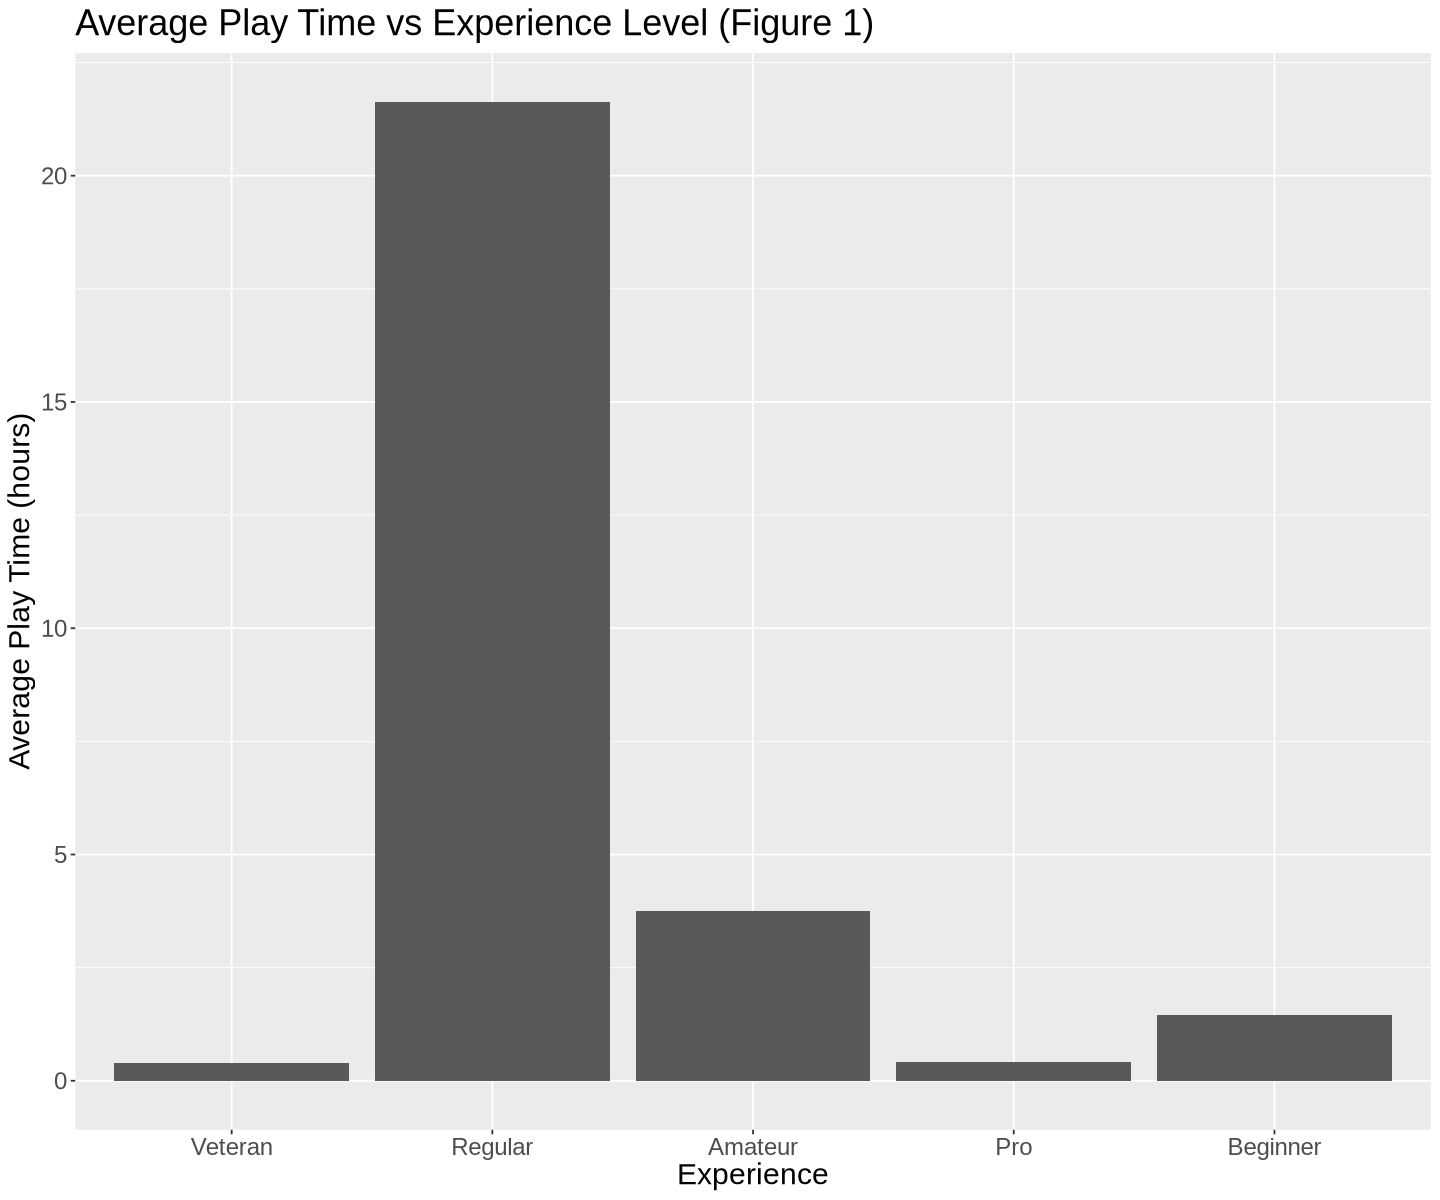

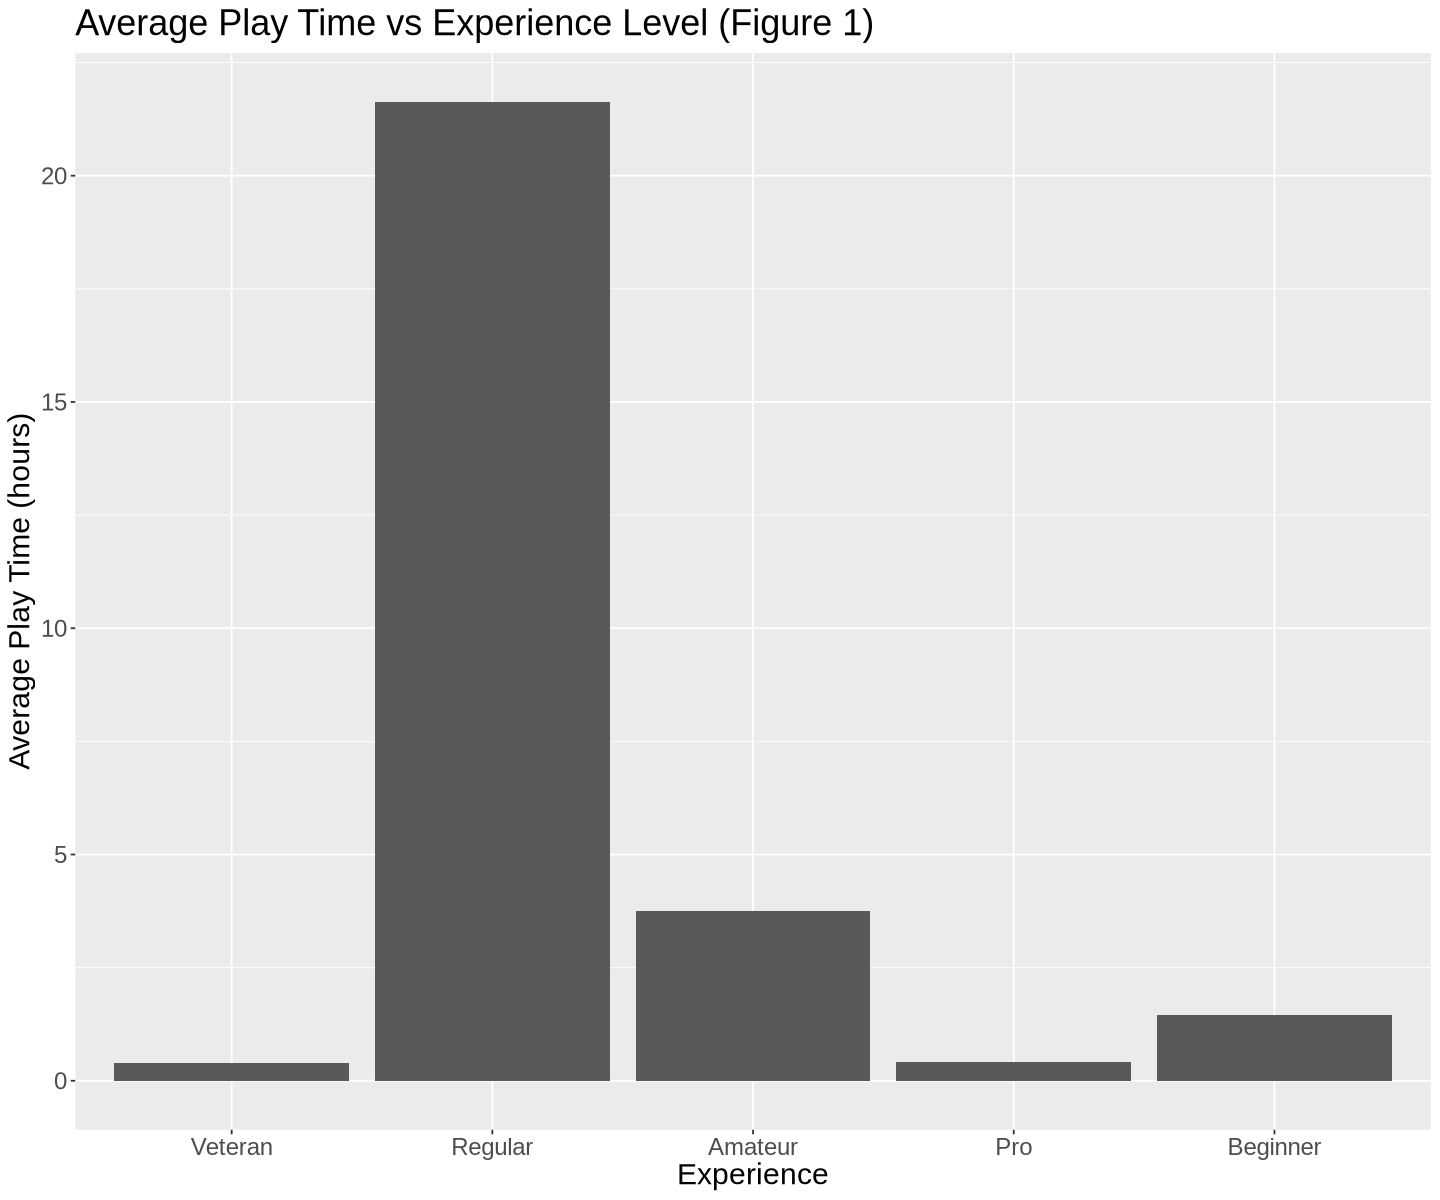

>>>>>>> remote


In [ ]:
#Code for Experience

options(repr.plot.width = 12, repr.plot.height = 10)

player_data_average_graph <- players_data_tidy_train |>
                        group_by(experience) |>
                        summarize(average = mean(played_hours)) |>  # average play hours for each experience group
                        ggplot(aes(experience, average)) + # graph
                        geom_bar(stat="identity") +
                        labs(x="Experience", y="Average Play Time (hours)", title="Average Play Time vs Experience Level (Figure 1)") +
                        theme(text=element_text(size=18))

player_data_average_graph


<p>In Figure 1, the Minecraft players with the a regular experience level have a significantly higher total played time on average compared to the other experience levels. Therefore, the KNN regression will most likely predict for Minecraft players with a regular experience level to have high total played time.</p>
<p>Since experience is a categorical value, we must convert it to a form that can be used in regression. We will be using the one-hot encoding method.</p>

In [ ]:
player_data_one_hot_encoding <- dummyVars(" ~ experience ", data=players_data_tidy_train) # one-hot encoding the data to convert categorical to numerical

encoded_player_data <- predict(player_data_one_hot_encoding, newdata=players_data_tidy_train) 

encoded_player_data <- cbind(players_data_tidy_train, encoded_player_data)

<p>We will then plot the one-hot encoded value for each category and compare.</p>

<<<<<<< local


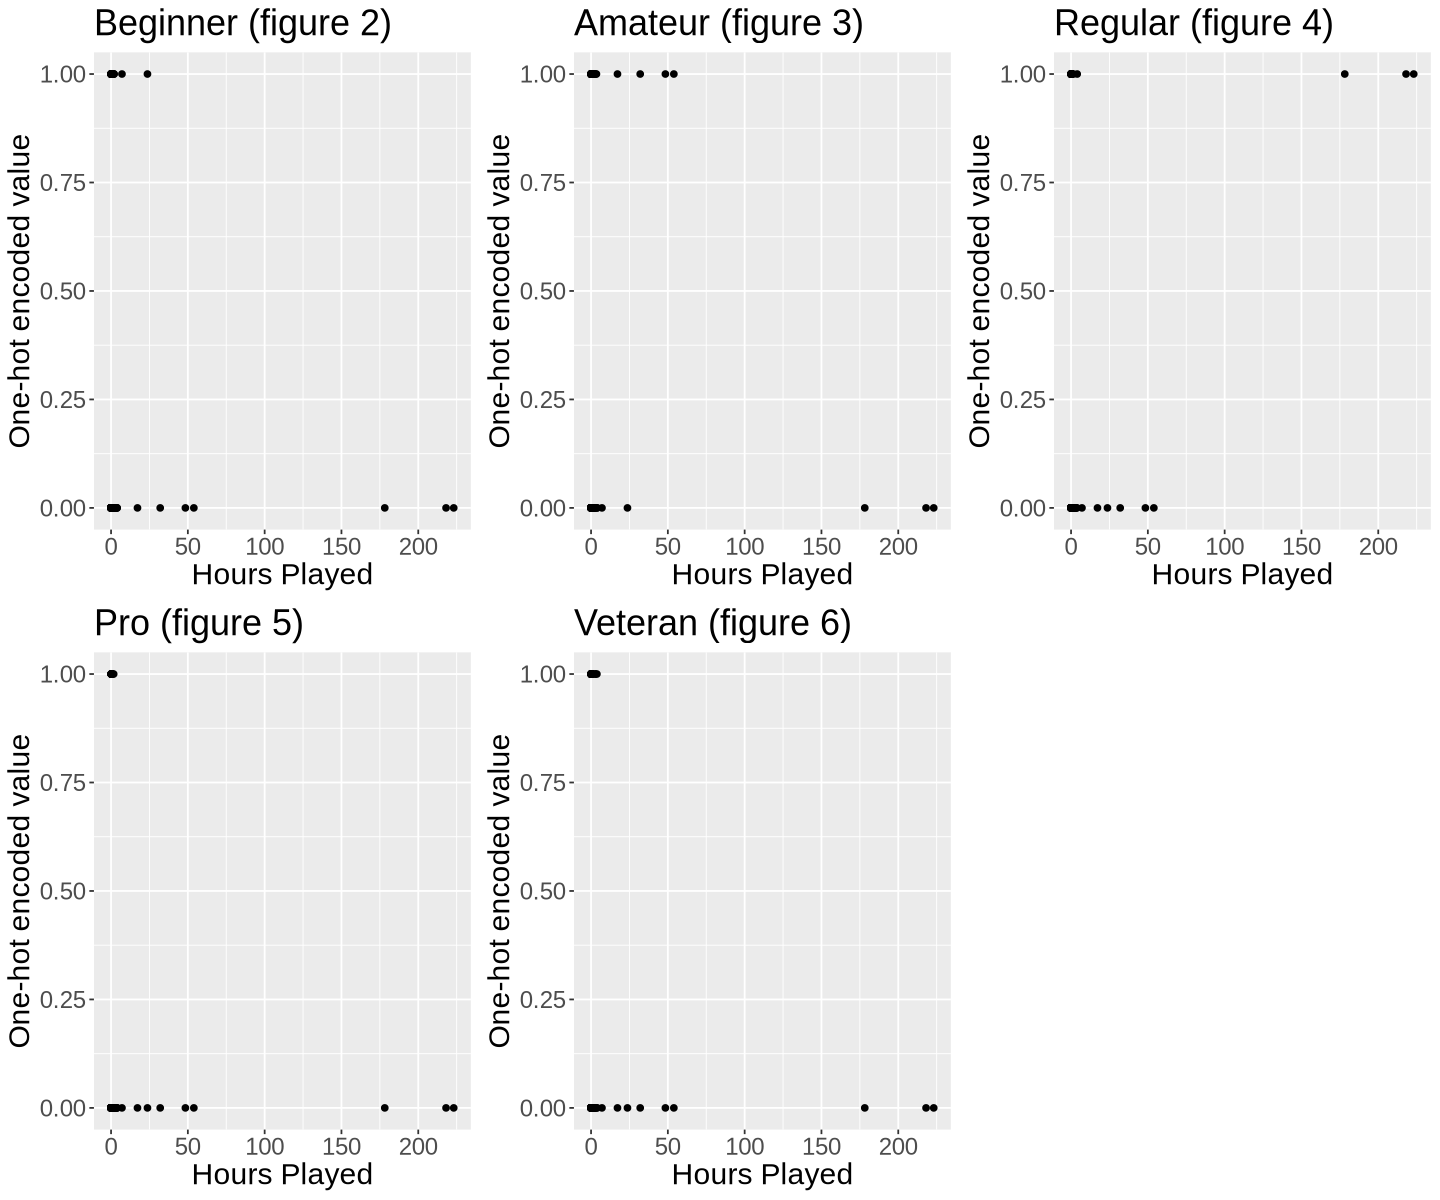

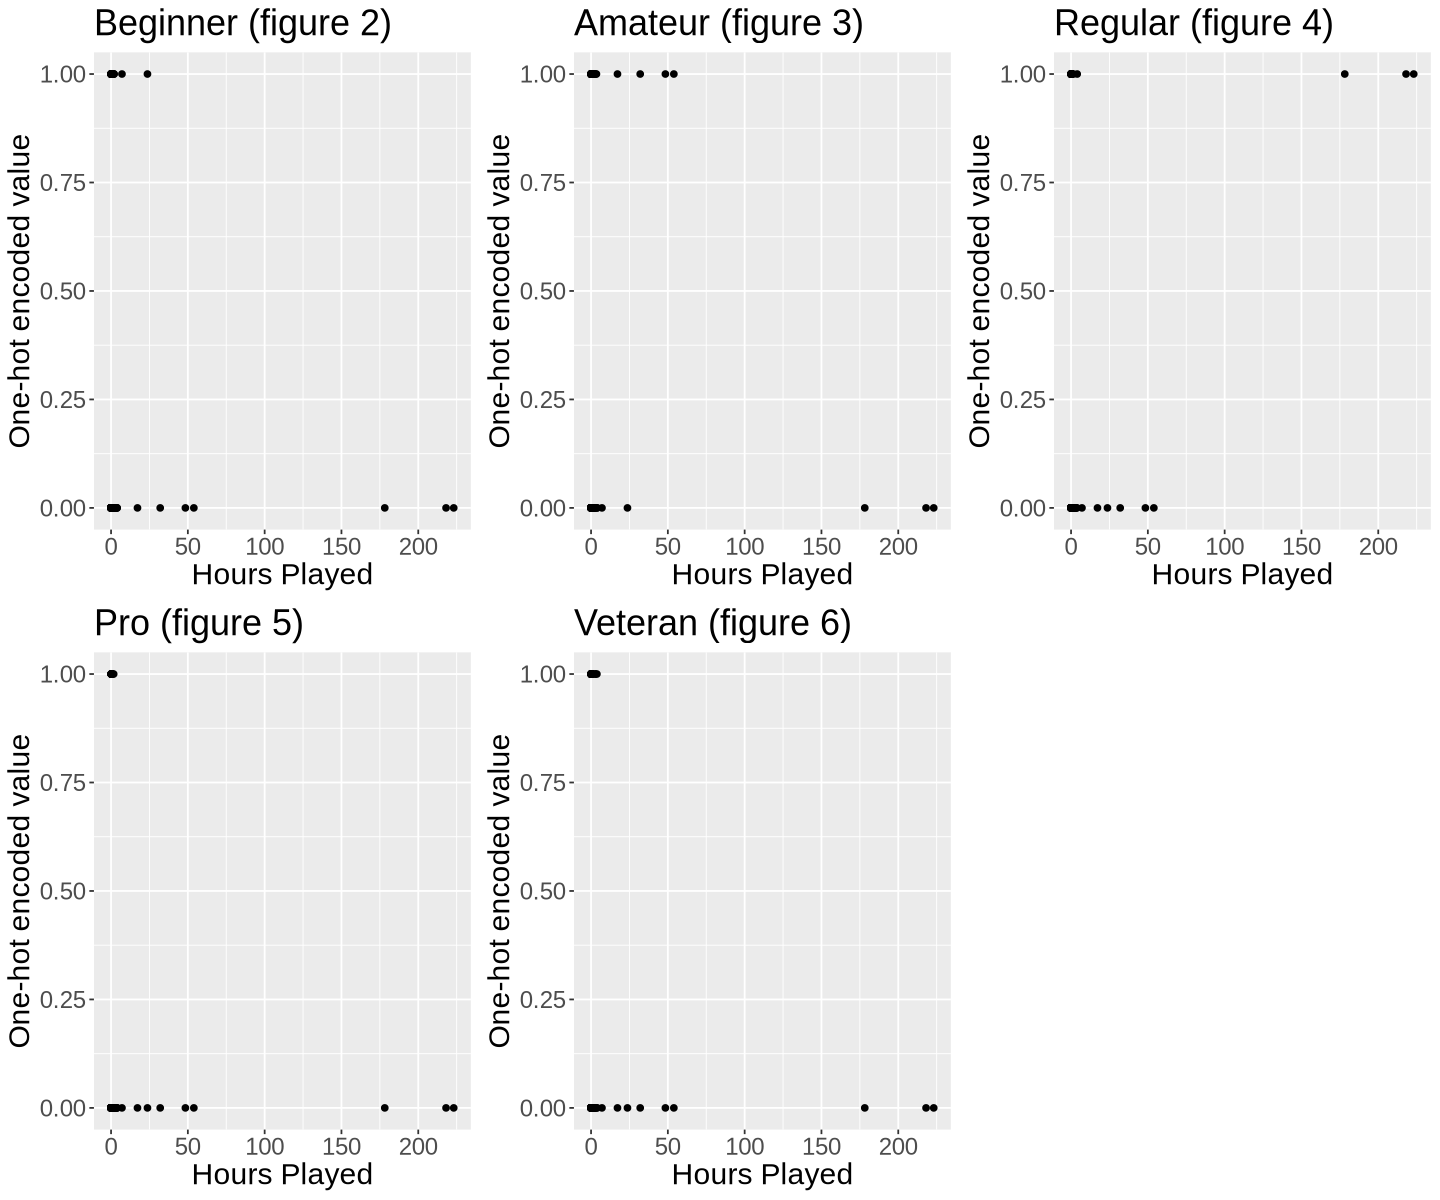

>>>>>>> remote


In [ ]:
Veteran_encoded_graph <- ggplot(encoded_player_data, aes(x=played_hours, y=experience.Veteran)) +
                            geom_point() +
                            labs(x="Hours Played", y="One-hot encoded value", title="Veteran (figure 6)") +
                            theme(text=element_text(size=18))

Regular_encoded_graph <- ggplot(encoded_player_data, aes(x=played_hours, y=experience.Regular)) +
                            geom_point() +
                            labs(x="Hours Played", y="One-hot encoded value", title="Regular (figure 4)") +
                            theme(text=element_text(size=18))

Amateur_encoded_graph <- ggplot(encoded_player_data, aes(x=played_hours, y=experience.Amateur)) +
                            geom_point() +
                            labs(x="Hours Played", y="One-hot encoded value", title="Amateur (figure 3)") +
                            theme(text=element_text(size=18))

Pro_encoded_graph <- ggplot(encoded_player_data, aes(x=played_hours, y=experience.Pro)) +
                            geom_point() +
                            labs(x="Hours Played", y="One-hot encoded value", title="Pro (figure 5)") +
                            theme(text=element_text(size=18))

Beginner_encoded_graph <- ggplot(encoded_player_data, aes(x=played_hours, y=experience.Beginner)) +
                            geom_point() +
                            labs(x="Hours Played", y="One-hot encoded value", title="Beginner (figure 2)") +
                            theme(text=element_text(size=18))

encoded_player_graph <- plot_grid(
    Beginner_encoded_graph,
    Amateur_encoded_graph,
    Regular_encoded_graph,
    Pro_encoded_graph,
    Veteran_encoded_graph) 


#encoded_player_graph
encoded_player_graph

<p>The One-hot encoded values are either 0 or 1 with 0 representing that its corresponding number of hours played does not exist in that category and 1 representing that it does exist. Therfore, we will mostly be focossing on the points with a one-hot encoded value of 1. Looking at Pro (figure 5) and Veteran (figure 6), the points at an one-hot encoded value of 1 are near 0 hours played. Beginner (figure 2) and Amateur (figure 3) have more spread out data points so people in this category played more hours. For Regular (figure 4), similar to the bar graph it has has the highest play time hours. All the graphs do have points at 0 hours which may skew the results of the regression.</p>

<h1>Data Analysis</h1>

<p>First, we will code experience into a discrete numerical variable where Amateur = 1, Beginner = 2, Regular = 3, Pro = 4, and Veteran = 5.  </p>

In [16]:
# Code for Regression

players_data_tidy_train$experience_numeric <- as.numeric(factor(players_data_tidy_train$experience, 
                                           levels = c("Amateur", "Beginner", "Regular", "Pro", "Veteran"), 
                                           ordered = TRUE))
head(players_data_tidy_train)


experience,age,played_hours,experience_numeric
<fct>,<dbl>,<dbl>,<dbl>
Veteran,17,0.0,5
Regular,21,0.1,3
Amateur,17,0.0,1
Regular,19,0.0,3
Amateur,21,0.0,1
Amateur,17,0.1,1


<p>We can now create our recipe and model with age and experience serving as the predictors:</p>

In [17]:
players_recipe <- recipe(played_hours ~ age + experience_numeric, data = players_data_tidy_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

players_spec <- nearest_neighbor(weight_func = "rectangular",
    neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

<p>Then, we will use 5-fold cross-validation to choose the number of neighbors via the minimum RMSPE:</p>

In [18]:

players_vfold <- vfold_cv(players_data_tidy_train, v = 5, strata = played_hours)

gridvals <- tibble(neighbors = seq(1, 110))

players_multi <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_spec) |>
  tune_grid(players_vfold, grid = gridvals) |>
  collect_metrics() |>
  filter(.metric == "rmse") |>
  filter(mean == min(mean))

players_k <- players_multi |>
              pull(neighbors)
players_multi

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,21.19135,5,10.64619,Preprocessor1_Model001


<p>the smallest estimated RMSPE from cross-validation occurs when K = 1. We will continue our regression with a K = 1.</p>

In [20]:
players_spec <- nearest_neighbor(weight_func = "rectangular",
    neighbors = players_k) |>
    set_engine("kknn") |>
    set_mode("regression")

knn_mult_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_spec) |>
  fit(data = players_data_tidy_train)

players_data_test$experience_numeric <- as.numeric(factor(players_data_test$experience, 
                                           levels = c("Amateur", "Beginner", "Regular", "Pro", "Veteran"), 
                                           ordered = TRUE))

knn_mult_preds <- knn_mult_fit |>
  predict(players_data_test) |>
  bind_cols(players_data_test)

knn_mult_mets <- metrics(knn_mult_preds, truth = played_hours, estimate = .pred) |>
                     filter(.metric == 'rmse')

knn_mult_mets

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,23.2899


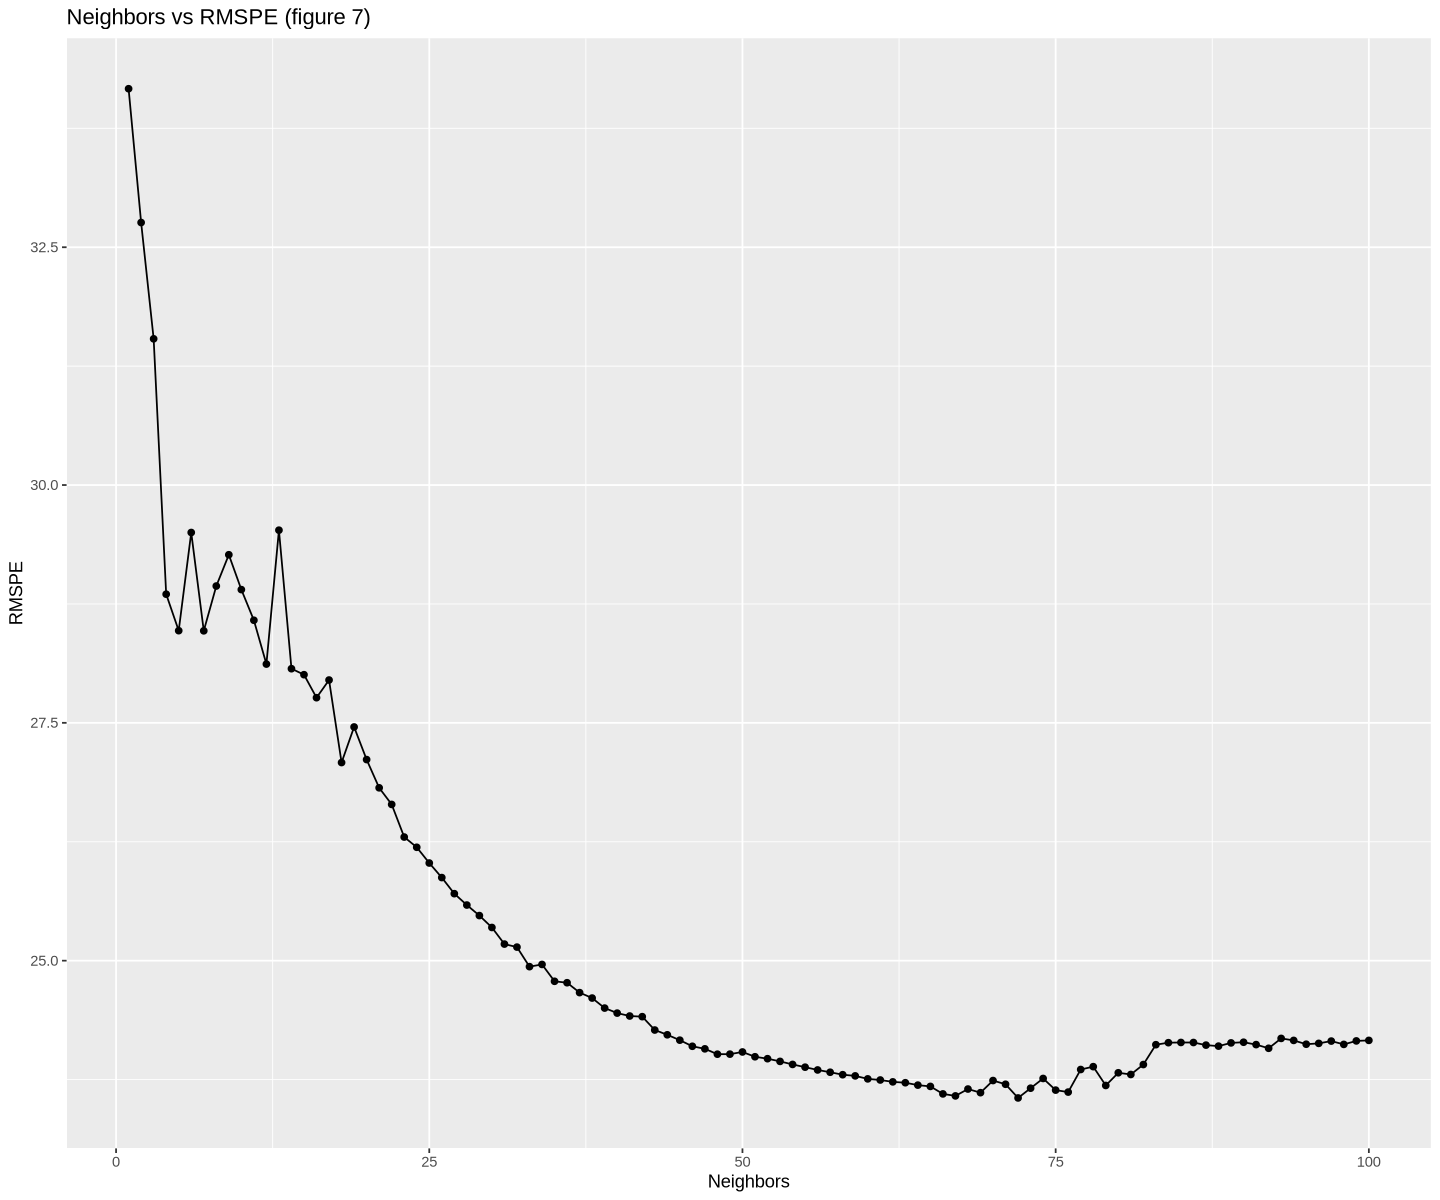

In [9]:
# Code for Regression

player_recipe <- recipe(played_hours ~ age + experience.Veteran + experience.Regular + experience.Amateur + 
                        experience.Pro + experience.Beginner, data=encoded_player_data) |>
                    step_scale(all_predictors()) |>
                    step_center(all_predictors())

player_spec <- nearest_neighbor(weight_func = "rectangular", neighbors=tune()) |>
                set_engine("kknn") |>
                set_mode("regression")

player_vfold <- vfold_cv(encoded_player_data, v = 5, strata = played_hours)

player_workflow <- workflow() |>
                    add_recipe(player_recipe) |>
                    add_model(player_spec)

gridvals <- tibble(neighbors = seq(from=1,to=100,by=1))

player_results <- player_workflow |>
                    tune_grid(resamples=player_vfold, grid=gridvals) |>
                    collect_metrics() |>
                    filter(.metric=="rmse")

neighbor_graph <- ggplot(player_results, aes(x=neighbors, y=mean)) +
                    geom_point() +
                    geom_line() +
                    labs(x="Neighbors", y="RMSPE", title="Neighbors vs RMSPE (figure 7)")

neighbor_graph

In [10]:
neighbor_min <- player_results |>
                    filter(mean == min(mean))

neighbor_min

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
72,rmse,standard,23.55682,5,9.073523,Preprocessor1_Model072


<h1>Discussion</h1>

<p>summarize what you found (Jacob)</p>

<p>discuss whether this is what you expected to find? (Alex)</p>

<p>discuss what impact could such findings have?</p> 

<p>discuss what future questions could this lead to?</p> (Aishna)

In the future, we can look into the incorporation of more variables such as gender...continue

<h1>References</h1>

<p>APA format??????</p>